## Task 1 - Monte Carlo Simulation

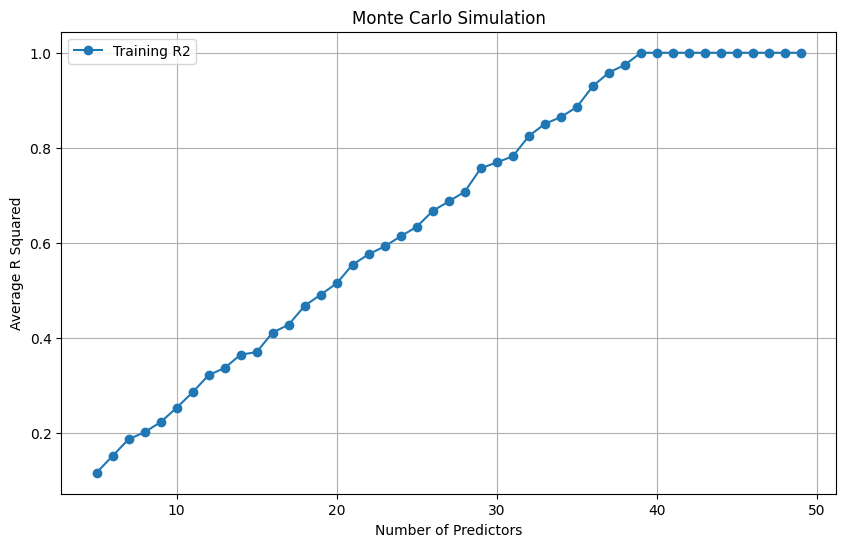

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic data
def generate_data(X, num_new_predictors):
    # Generate new random coefficients for new predictors
    new_coefficients = np.random.rand(num_new_predictors)

    # Generate noise for new predictors
    new_noise = 0.1 * np.random.randn(X.shape[0])

    # Add new predictors to the existing data
    new_predictors = np.random.rand(X.shape[0], num_new_predictors)
    X_new = np.concatenate([X, new_predictors], axis=1)

    # Update true coefficients and add noise
    true_coefficients = np.concatenate([np.zeros(X.shape[1]), new_coefficients])
    noise = new_noise
    y = X_new.dot(true_coefficients) + noise  # Updated true relationship + noise

    return X_new, y

# Step 2: Perform Monte Carlo simulation
num_simulations = 100
num_observations = 50
num_predictors_range = range(5, 50)  # Varying number of predictors

# Initialize data with the first set of predictors
X, y = generate_data(np.random.rand(num_observations, 5), 0)

r2_results_train = []
r2_results_val = []

for num_predictors in num_predictors_range:
    r2_simulations_train = []
    r2_simulations_val = []

    for _ in range(num_simulations):
        # Add new predictors to the existing data
        X, y = generate_data(X, num_predictors - X.shape[1])

        # Split data into training, validation, and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit linear regression model on the training set
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the training set
        y_train_pred = model.predict(X_train)
        r2_train = r2_score(y_train, y_train_pred)
        r2_simulations_train.append(r2_train)

        # Make predictions on the validation set
        y_test_pred = model.predict(X_test)
        r2_val = r2_score(y_test, y_test_pred)
        r2_simulations_val.append(r2_val)

    # Calculate average R-squared across simulations for each number of predictors
    r2_avg_train = np.mean(r2_simulations_train)
    r2_results_train.append(r2_avg_train)

    r2_avg_val = np.mean(r2_simulations_val)
    r2_results_val.append(r2_avg_val)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_predictors_range, r2_results_train, marker='o', label='Training R2')
#plt.plot(num_predictors_range, r2_results_val, marker='o', label='Validation R2')
plt.title('Monte Carlo Simulation')
plt.xlabel('Number of Predictors')
plt.ylabel('Average R Squared')
plt.legend()
plt.grid(True)
plt.show()


## Task 4 - Demonstration on Wine Quality dataset

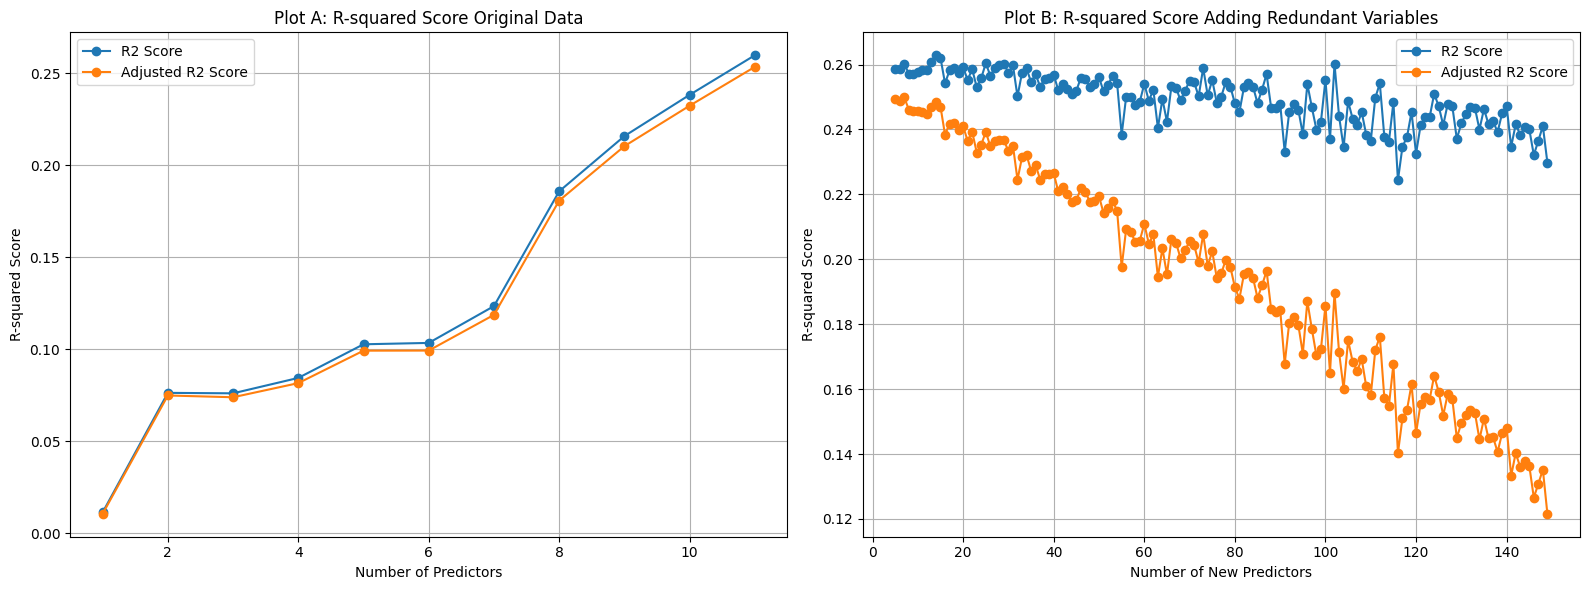

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo

# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Perform incremental addition of variables and calculate R-squared
num_variables_range = range(1, 11 + 1)
X=X.values
r2_scores = []
adj_r2_scores = []

for num_variables in num_variables_range:
    # Select the first num_variables numeric features
    X_selected = X[:, :num_variables]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Fit linear regression model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate adjusted R-squared
    n = X_test.shape[0]  # Number of observations
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    adj_r2_scores.append(adj_r2)

# Perform incremental addition of predictors with new random predictors
num_new_predictors_range = range(5, 150, 1)  # Define the range for adding new random predictors
new_predictors_r2_scores = []
new_predictors_adj_r2_scores = []

for num_new_predictors in num_new_predictors_range:
    # Generate new random predictors
    new_predictors = np.random.rand(X.shape[0], num_new_predictors)

    # Concatenate new random predictors with existing features
    X_with_new_predictors = np.concatenate([X, new_predictors], axis=1)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_with_new_predictors, y, test_size=0.2, random_state=42)

    # Fit linear regression model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    new_predictors_r2_scores.append(r2)

    # Calculate adjusted R-squared
    n = X_test.shape[0]  # Number of observations
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    new_predictors_adj_r2_scores.append(adj_r2)

# Plot both results side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the first loop
axs[0].plot(num_variables_range, r2_scores, marker='o', label='R2 Score')
axs[0].plot(num_variables_range, adj_r2_scores, marker='o', label='Adjusted R2 Score')
axs[0].set_title('Plot A: R-squared Score Original Data')
axs[0].set_xlabel('Number of Predictors')
axs[0].set_ylabel('R-squared Score')
axs[0].legend()
axs[0].grid(True)

# Plot for the second loop
axs[1].plot(num_new_predictors_range, new_predictors_r2_scores, marker='o', label='R2 Score')
axs[1].plot(num_new_predictors_range, new_predictors_adj_r2_scores, marker='o', label='Adjusted R2 Score')
axs[1].set_title('Plot B: R-squared Score Adding Redundant Variables')
axs[1].set_xlabel('Number of New Predictors')
axs[1].set_ylabel('R-squared Score')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
